In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

In [2]:
xl = pd.ExcelFile(r"C:/Users/culle/Documents/Data/Sed_Field_Data/West_Tornillo_Flat_Sed_Data.xlsx")
df = xl.parse("Sheet1")
df[:5] # shows first 5 rows

,ID,name,lat,lon,ele,cb,cbt,D50,structure,"bedding, bar, paleocurrent",strthick,dip direct,dip,declination (should be 6-7 Degrees East of North),description
0,1,20TO07,29.439628,-103.147112,861.771851,NaN,1.80,NaN,bedding,bedding,NaN,210.0,25.0,4 East,NaN
1,2,20TO08A,29.454388,-103.180511,921.821472,2.1,2.70,medium lower,bedding,bedding,NaN,25.0,12.0,0,"sh to sm, well-sorted, lith/feldsarenite, thic..."
2,3,20TO08B,29.454567,-103.180630,922.976868,2.1,0.96,NaN,bedding,bedding,NaN,235.0,24.0,0,NaN
3,4,20TO08C,29.454695,-103.180710,924.550232,2.1,0.53,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,5,20TO08D,29.454677,-103.180996,925.315613,2.1,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [69]:
# Isolate dataframes for 'bar' or 'paleocurrent' or any other directional data.

# Use this block (df.loc; below) when plotting all the directional data of specific type in your dataset
dip_directions = df.loc[df['bedding, bar, paleocurrent']=='bar']

# Use this block (below) to isolate directional data from a specific sample or location from within your data set
#location = df.loc[df['name']=='20TO25A']
#dip_directions = location.loc[df['bedding, bar, paleocurrent']=='bar']

dip_directions[:5] # shows first 5 rows

,ID,name,lat,lon,ele,cb,cbt,D50,structure,"bedding, bar, paleocurrent",strthick,dip direct,dip,declination (should be 6-7 Degrees East of North),description
11,11,20TO10C,29.455448,-103.181528,922.627747,1.1,NaN,medium lower,bar-scale low angle cross-beds,bar,NaN,99.0,14.0,0,"low angle cross-beds, interbedded mud and 20-4..."
12,11,20TO10C,29.455448,-103.181528,922.627747,1.1,NaN,medium lower,bar-scale low angle cross-beds,bar,NaN,110.0,9.0,0,"low angle cross-beds, interbedded mud and 20-4..."
13,11,20TO10C,29.455448,-103.181528,922.627747,1.1,NaN,medium lower,bar-scale low angle cross-beds,bar,NaN,106.0,16.0,0,"low angle cross-beds, interbedded mud and 20-4..."
14,11,20TO10C,29.455448,-103.181528,922.627747,1.1,NaN,medium lower,bar-scale low angle cross-beds,bar,NaN,120.0,14.0,0,"low angle cross-beds, interbedded mud and 20-4..."
23,14,20TO11B,29.456520,-103.183659,943.948975,1.2,5.37,medium lower,high angle cross beds,bar,2.21,100.0,16.0,0,"large cross-beds, well-sorted, felds-lithic mi..."


In [70]:
# bin directional data using np.histogram
bin_width = 20 # bin width in degrees; can only be integers
bin_num = int((360 / bin_width) + 1)
hist, bins = np.histogram(dip_directions['dip direct'], np.linspace(0, 360, num=bin_num))

# the array 'bins' gives the bin edges, so we need to center the bins and drop the bottom value in the array:
bins_centered = bins[1:] - (bin_width / 2)

#degrees to radians
bins_as_radians = bins_centered * (np.pi/180)

# Can use these variables below to quality check your output numpy arrays
hist
#bins
#bins_centered

array([ 3,  1, 11, 22, 18, 13, 39, 28, 27, 12,  8,  3,  3,  6,  7,  6,  1,
        1], dtype=int64)

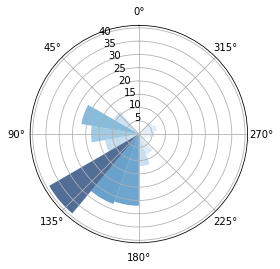

In [71]:
# Plotting your polar histogram/rose diagram

theta = bins_as_radians
radii = hist
width = bin_width * (np.pi/180) # bin width converted to radians
colors = plt.cm.Blues(radii / np.amax(hist)) # see matplotlib colors for color maps (change cm.Blues to cm.Greens, etc.)

ax = plt.subplot(projection='polar')
#ax.set_theta_direction(-1) # activate this line to make the degrees plot clockwise
ax.set_theta_offset(np.pi / 2.0) # use this to set the 0 degree location
ax.bar(theta, radii, width=width, bottom=0.0, color=colors, alpha=0.7)

plt.show()